In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [30]:
#探索的データ分析のためのライブラリインポート
import numpy as np
import pandas as pd
!pip install -U kaleido
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image, display
!pip install Japanize-matplotlib
import japanize_matplotlib
import os
os.getcwd()

'/Users/okadahiroaki/Downloads/kaggle/titanic_project/練習'

In [31]:
#データの読み込み
train_df=pd.read_csv("../titanic/train.csv")
test_df=pd.read_csv("../titanic/test.csv")


In [32]:
# 不要な警告を抑える
import warnings
warnings.filterwarnings("ignore" ,message=".*invalid value encountered in.*")

In [33]:
#見やすくinfoを比べる
from io import StringIO
from IPython.display import display , HTML
buffer1=StringIO()
buffer2=StringIO()
train_df.info(buf=buffer1)
test_df.info(buf=buffer2)
info1=buffer1.getvalue()
info2=buffer2.getvalue()
html = f"""
<div style="display: flex; gap: 10px;">
    <div>
        <div style="font-weight: bold; margin-bottom: 5px;">Train</div>
        <pre style="border: 1px solid #ccc; padding: 10px;">{info1}</pre>
    </div>
    <div>
        <div style="font-weight: bold; margin-bottom: 5px;">Test</div>
        <pre style="border: 1px solid #ccc; padding: 10px;">{info2}</pre>
    </div>
</div>
"""
display(HTML(html))


In [34]:
#passengerIDはindexと実質同じであることの確認
assert((train_df["PassengerId"]==train_df.index+1).all())
assert((test_df["PassengerId"]==test_df.index+1+len(train_df)).all())



In [35]:
#性質ごとに特徴量を分ける
target="Survived" #目的変数
cont_num_att=["Age" ,"Fare"] #連続値
disc_num_att=["SibSp" , "Parch"] #離散値
cat_att=["Pclass" , "Embarked" , "Sex"]#カテゴリ変数



# 探索的データ分析
##### Survived
* 訓練データの61%は死亡している
* 訓練データに対して、予測精度61%は最低でも必要
##### Age Fare
* ほとんどの乗客は20~40歳
* ほとんどの乗客の運賃は非常に安い
##### SibSp Parch
* ほとんどの乗客は家族と一緒ではない
##### Sex Pclass Embarked
* 64%男性 7割S 55%3等


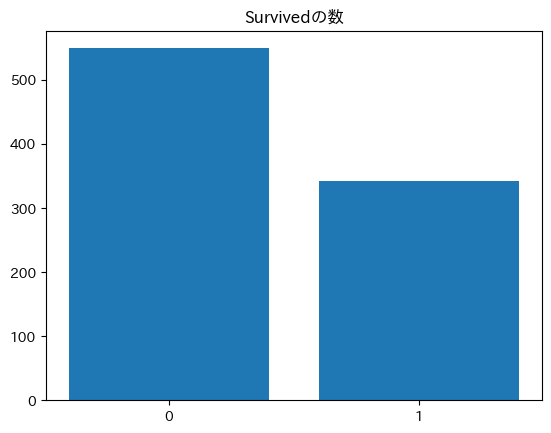

[0.61616162 0.38383838]


In [36]:
#survived
cat,counts=np.unique(train_df["Survived"] ,return_counts=True)
plt.bar(x=cat.astype(str) , height=counts)
plt.title("Survivedの数")
plt.show()

perc = counts/len(train_df)
print(perc)

cat,counts=np.unique(train_df[target] ,return_counts=True)
perc=(counts/len(train_df)*100).round(1)
import plotly.graph_objects as go



fig = make_subplots(rows=1, cols=1, subplot_titles=[target])

cat, counts = np.unique(train_df[target], return_counts=True)
perc = (counts / len(train_df[target]) * 100).round(1)
fig.add_trace(
    go.Bar(
        x=cat.astype(str),
        y=counts,
        width=0.5,
        text=np.char.add(perc.astype(str), "%"),
        textfont_size=11,
        hovertext=counts,
        hoverinfo="text",
        textposition="outside",
        marker_color="royalblue",
    ),
    row=1,
    col=1,
)
fig.update_yaxes(range=[0,counts.max()*1.15] , row=1 , col=1)
fig.update_layout(title_text="Target")
fig.show()




/Users/okadahiroaki/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/okadahiroaki/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/okadahiroaki/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/okadahiroaki/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/okadahiroaki/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureW

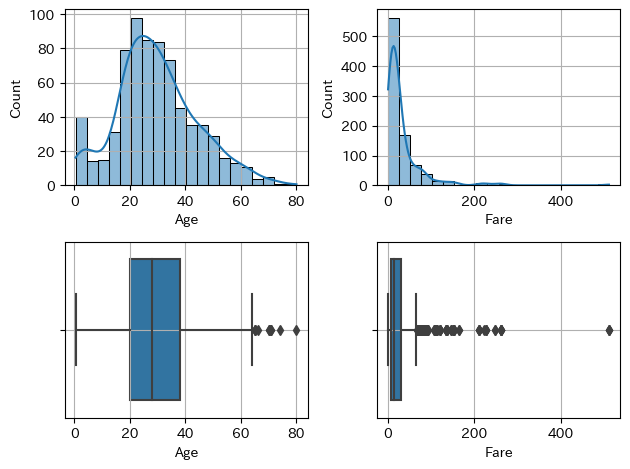

In [37]:
#Age Fare

fig,axes=plt.subplots(2,2)
sns.histplot(train_df,x="Age", bins=20 , kde=True , ax=axes[0,0])
axes[0,0].grid(True)
sns.boxplot(train_df , x="Age"  ,ax=axes[1,0])
axes[0,1].grid(True)
sns.histplot(train_df , x="Fare" , bins=20 , kde=True , ax=axes[0,1])
axes[1,0].grid(True)
sns.boxplot(train_df , x="Fare" , ax=axes[1,1])
axes[1,1].grid(True)
plt.tight_layout()
plt.show()



/Users/okadahiroaki/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/okadahiroaki/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/okadahiroaki/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/okadahiroaki/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/okadahiroaki/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarni

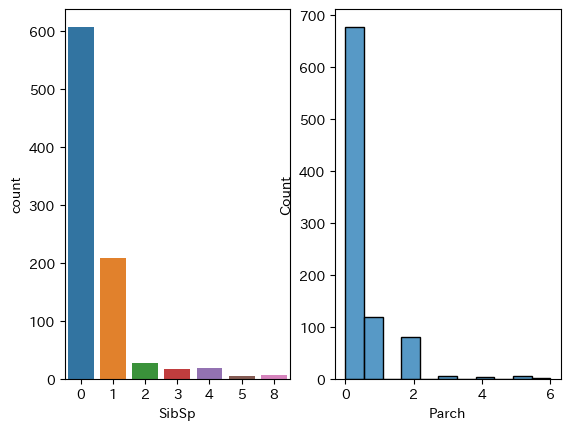

In [38]:
fig,axes=plt.subplots(1,2)
sns.countplot(train_df,x="SibSp",ax=axes[0] )
sns.histplot(train_df["Parch"] , ax=axes[1])
plt.show()

cat_S,counts_S=np.unique(train_df["SibSp"] , return_counts=True)
perc_S=(counts_S/len(train_df)*100).round(1)

cat_P,counts_P=np.unique(train_df["Parch"] , return_counts=True)
perc_P=(counts_P/len(train_df)*100).round(1)

fig=make_subplots(rows=1, cols = 2,subplot_titles=["SibSp","Parch"])
fig.add_trace(
    go.Bar(
        x=cat_S.astype(str),
        y=counts_S ,
        width=0.5,
         text=np.char.add(perc_S.astype(str) , "%") ,
        textposition="outside",
         hovertext=counts_S,
         hoverinfo="text"
        ),
    row=1,
    col=1
)
fig.add_trace(
    go.Bar(
        x=cat_P.astype(str),
        y=counts_P,
        width=0.5,
        text=np.char.add(perc_P.astype(str),"%"),
        hovertext=counts_P,
        hoverinfo="text",
        textposition="outside"
    ),
    row=1,
    col=2
)
fig.update_yaxes(range=[0,counts_S.max()*1.15],row=1,col=1)
fig.update_xaxes(linecolor="grey",showline=True,mirror=True)
fig.update_yaxes(range=[0,counts_P.max()*1.15] , row=1,col=2)
fig.update_layout(
     width=1000,
    height=500,
     margin=dict(l=35, r=10, t=50, b=5),
)
fig.show()

In [39]:
test_df[cont_num_att].agg(["min","max"]).T

,min,max
Age,0.17,76.0000
Fare,0.00,512.3292


/Users/okadahiroaki/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/okadahiroaki/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/okadahiroaki/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/okadahiroaki/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/okadahiroaki/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarni

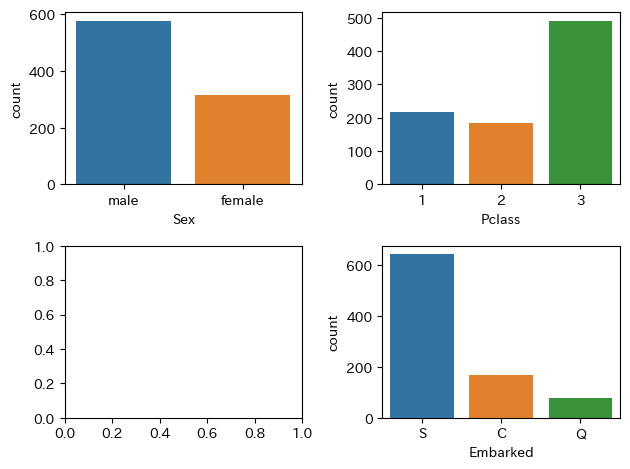

Sex [0.35241302 0.64758698]
Pclass [0.24242424 0.20650954 0.55106622]
Embarked [0.18855219 0.08641975 0.72278339]


In [40]:
fix ,axes=plt.subplots(2,2)
sns.countplot(data=train_df,x="Sex" ,ax=axes[0,0])
sns.countplot(data=train_df ,x="Pclass" ,ax=axes[0,1])
sns.countplot(data=train_df , x="Embarked" ,ax=axes[1,1])
plt.tight_layout()
plt.show()
for col in ["Sex" ,"Pclass" ,"Embarked"]:
    cat,counts=np.unique(train_df[col].dropna() , return_counts=True)
    print(col,counts/len(train_df))

In [41]:
print(train_df[cat_att].agg(lambda x: (x.unique())).T)
print(test_df[cat_att].agg(lambda x : (x.unique())).T)

Pclass           [3, 1, 2]
Embarked    [S, C, Q, nan]
Sex         [male, female]
dtype: object
Pclass           [3, 2, 1]
Embarked         [Q, S, C]
Sex         [male, female]
dtype: object


# Nameから情報を得る
- 全員苗字がわかっている
- 同じ名前の人はいない
- セカンドネームを持っている人がいる
- 同じファーストネームを持つ人のファーストネームの種類は135のみ
- 40%ぐらいの人は同じファーストネームを持つ人がいる。家族かもしれない

In [42]:
assert train_df["Name"].str.match(r"\S.*,").all()
assert test_df["Name"].str.match(r"\S.*,").all()
print(len(train_df),len(np.unique(train_df["Name"])))
print(len(test_df) , len(np.unique(test_df["Name"])))

891 891
418 418


In [43]:
train_df["Surname"]=train_df["Name"].str.split(",").str[0]
test_df["Surname"]=test_df["Name"].str.split(",").str[0]


train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [44]:
# Surnames with non-alphabetic characters 
train_df.loc[lambda x: x['Surname'].str.contains(r"[^a-zA-Z '\s]"), ['Surname']]


,Surname
39,Nicola-Yarred
49,Arnold-Franchi
125,Nicola-Yarred
184,Kink-Heilmann
192,Andersen-Jensen
351,Williams-Lambert
353,Arnold-Franchi
430,Bjornstrom-Steffansson
444,Johannesen-Bratthammer
587,Frolicher-Stehli


In [45]:
test_df.loc[lambda x : x["Surname"].str.contains(r"[^a-zA-Z '\s]") ,["Surname"]]

,Surname
144,Lindeberg-Lind
165,Kink-Heilmann
394,Kink-Heilmann
397,Frolicher-Stehli
398,Larsson-Rondberg


In [46]:
train_df["Secondary_Surname"]=train_df["Surname"].str.split("-").str[1]
train_df["Surname"]=train_df["Surname"].str.split("-").str[0]

test_df["Secondary_Surname"]=test_df["Surname"].str.split("-").str[1]
test_df["Surname"]=test_df["Surname"].str.split("-").str[0]

In [47]:
train_df["Surname"].value_counts().loc[lambda x:x>1]

Surname
Andersson    9
Sage         7
Panula       6
Skoog        6
Johnson      6
            ..
Futrelle     2
Nasser       2
Petroff      2
Cacic        2
Kantor       2
Name: count, Length: 135, dtype: int64

In [48]:
train_df["Surname"].value_counts().loc[lambda x : x>1].sum()/len(train_df)
print(round(0.14355,3))

0.144


In [49]:
fig=go.Figure()
cat,counts=np.unique(train_df["Surname"].value_counts() , return_counts=True)
perc=(counts/len(train_df)*100).round(1)